In [1]:
using Distributions
using LinearAlgebra
using PyPlot
using ProgressMeter
using Random

# Load and Test Scripts

In [2]:
include("./../scripts/Grid.jl")

kernmat (generic function with 1 method)

  0.661251 seconds (174.82 k allocations: 441.858 MiB, 35.76% gc time, 8.81% compilation time)
0.9998754938835532

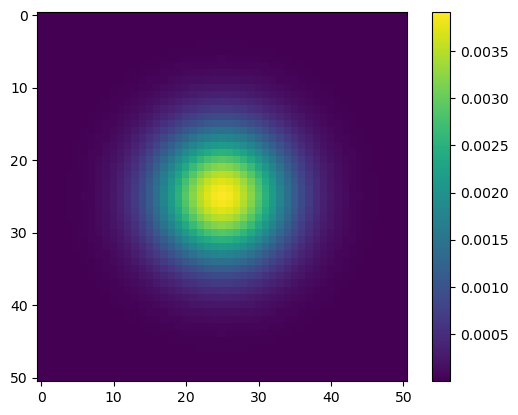

In [3]:
let n = 51
    l = 1.0
    sig = l/8
    kernmat(x->exp(-x^2/(2sig^2))/(2π*sig^2),l,2) # compile
    @time A = kernmat(x->exp(-x^2/(2sig^2))/(2π*sig^2),l,n)
    centidx = (n÷2)*n+n÷2+1
    imshow(unflatten(A[centidx,:],n))
    colorbar()
    print(sum(unflatten(A[centidx,:],n)))
end

# Numerically Diagonalize $L^P$ Operator

In [4]:
function buildLP(rho::Float64,zet::Float64,eta::Float64,l::Float64,n::Int64)
    Amat = kernmat(x->exp(-x^2/(2rho^2)/(2π*rho^2)),l,n)
    Cmat = kernmat(x->exp(-x^2/(2zet^2)/(2π*zet^2)),l,n)
    Imat = kernmat(x->exp(-x^2/(2eta^2)/(2π*eta^2)),l,n)
    
    sqrtA = flatten(sqrt.(Amat))
    
    L = sqrtA.*kron(Imat,Cmat).*sqrtA'
    
    P = Matrix{Float64}(I(n^4))
    grididxs = unflatten([1:n^2;],n)
    Pbet = zeros(n^2)
    for i in 1:n, j in 1:n
        grididx = grididxs[i,j]
        Pbet[grididx] = 1
        aPbet = kron(Amat[:,grididx],Pbet)
        BLAS.ger!(-1.0,aPbet,aPbet,P)
        Pbet[grididx] = 0
    end
    
    return P*L*P
end

buildLP (generic function with 1 method)

In [5]:
buildLP(6.5,0.75*6.5,0.25*6.5,5*6.5,2) # compile
@time LP = buildLP(6.5,0.75*6.5,0.25*6.5,5*6.5,8)

  4.139952 seconds (5.43 k allocations: 659.701 MiB, 0.85% gc time)


4096×4096 Matrix{Float64}:
 3.35724e11  3.34696e11  3.31634e11  …  3.27035e11  3.31593e11  3.34163e11
 3.34696e11  3.3523e11   3.33713e11     3.21517e11  3.27516e11  3.31593e11
 3.31634e11  3.33713e11  3.33753e11     3.26074e11  3.21517e11  3.27035e11
 3.26594e11  3.30173e11  3.31754e11     3.28679e11  3.25594e11  3.20572e11
 3.19669e11  3.24677e11  3.27753e11     3.29282e11  3.27713e11  3.2416e11
 3.26594e11  3.21083e11  3.25634e11  …  3.31754e11  3.31714e11  3.29647e11
 3.31634e11  3.27556e11  3.21556e11     3.32202e11  3.33713e11  3.33181e11
 3.34696e11  3.32122e11  3.27556e11     3.30619e11  3.33672e11  3.34696e11
 3.34696e11  3.33672e11  3.30619e11     3.24519e11  3.29043e11  3.31593e11
 3.33672e11  3.34204e11  3.32691e11     3.19044e11  3.24997e11  3.29043e11
 3.30619e11  3.32691e11  3.32732e11  …  3.23566e11  3.19044e11  3.24519e11
 3.25594e11  3.29162e11  3.30739e11     3.26151e11  3.2309e11   3.18106e11
 3.1869e11   3.23683e11  3.2675e11      3.2675e11   3.25192e11  3.21667e11